In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from cosmoprimo.fiducial import DESI

cosmo = DESI()
edges = np.linspace(0., 0.3, 31)
k = (edges[:-1] + edges[1:]) / 2.
nmodes = 4. * np.pi / 3. * (edges[1:]**3 - edges[:-1]**3)
z = 1
fo = cosmo.get_fourier()
pk = fo.pk_interpolator(of='delta_cb')(k, z=z)
pk = pk_lin_total2
b = 1.
f = fo.sigma8_z(z, of='theta_cb') / fo.sigma8_z(z, of='delta_cb')
s8 = fo.sigma8_z(z, of='delta_cb')
print(s8)
shotnoise = 1 / 5e-4
volume = 1e10

ells = (0, 2, 4)
poles = []
poles.append((b**2 + 2. / 3. * f * b + 1. / 5. * f**2) * pk + shotnoise)
poles.append((4. / 3. * f * b + 4. / 7. * f**2) * pk)
poles.append(8. / 35 * f**2 * pk)
poles = np.array(poles, dtype='f8')

from pypower import PowerSpectrumStatistics
mean = PowerSpectrumStatistics(edges, k, poles, nmodes=nmodes, ells=ells, shotnoise_nonorm=shotnoise, statistic='multipole')
cov = [2. * (2. * np.pi)**3 / (2 * ell + 1) / (volume * nmodes) * poles[0]**2 for ell in ells]
cov = np.diag(np.concatenate(cov, axis=0))

rng = np.random.RandomState(seed=42)
mocks = []
for i in range(1000):
    tmp = mean.deepcopy()
    tmp.power_nonorm.flat[...] = rng.multivariate_normal(mean.power_nonorm.ravel(), cov)
    mocks.append(tmp)
data, mocks = mocks[0], mocks[1:]

NameError: name 'pk_lin_total2' is not defined

In [41]:
import baccoemu
params = {
    'omega_cold'    :  0.3144,
    'A_s'           :  2.083e-9,
    'omega_baryon'  :  0.049,
    'ns'            :  0.96,
    'hubble'        :  0.6736,
    'neutrino_mass' :  0.059,
    'w0'            : -1.0,
    'wa'            :  0.0,
    'expfactor'     :  0.5
}
emulator = baccoemu.Matter_powerspectrum()
k, pk_lin_total = emulator.get_linear_pk(k=k, cold=False, **params)

2025-07-25 05:51:59.358533: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-25 05:51:59.359359: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-25 05:51:59.447856: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [50]:
emulator = baccoemu.Matter_powerspectrum()
k, pk_lin_total2 = emulator.get_nonlinear_pk(k=k, cold=False, **params)
k, pk_lin_nw = emulator.get_no_wiggles_pk(k=k, cold=False, **params)

Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...
Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda

In [51]:
k

array([0.01  , 0.0119, 0.0138, 0.0157, 0.0176, 0.0195, 0.0214, 0.0233,
       0.0252, 0.0271, 0.029 , 0.0309, 0.0328, 0.0347, 0.0366, 0.0385,
       0.0404, 0.0423, 0.0442, 0.0461, 0.048 , 0.0499, 0.0518, 0.0537,
       0.0556, 0.0575, 0.0594, 0.0613, 0.0632, 0.0651, 0.067 , 0.0689,
       0.0708, 0.0727, 0.0746, 0.0765, 0.0784, 0.0803, 0.0822, 0.0841,
       0.086 , 0.0879, 0.0898, 0.0917, 0.0936, 0.0955, 0.0974, 0.0993,
       0.1012, 0.1031, 0.105 , 0.1069, 0.1088, 0.1107, 0.1126, 0.1145,
       0.1164, 0.1183, 0.1202, 0.1221, 0.124 , 0.1259, 0.1278, 0.1297,
       0.1316, 0.1335, 0.1354, 0.1373, 0.1392, 0.1411, 0.143 , 0.1449,
       0.1468, 0.1487, 0.1506, 0.1525, 0.1544, 0.1563, 0.1582, 0.1601,
       0.162 , 0.1639, 0.1658, 0.1677, 0.1696, 0.1715, 0.1734, 0.1753,
       0.1772, 0.1791, 0.181 , 0.1829, 0.1848, 0.1867, 0.1886, 0.1905,
       0.1924, 0.1943, 0.1962, 0.1981, 0.2   ])

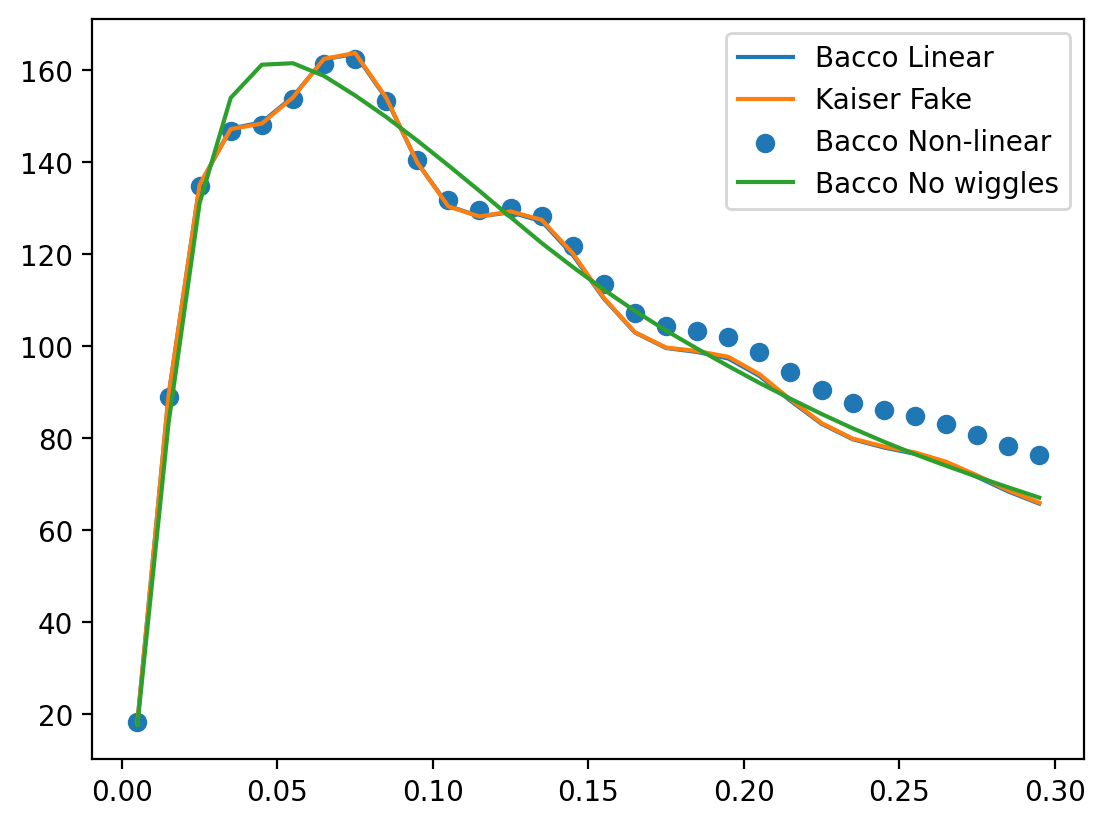

In [50]:
plt.plot(k,pk_lin_total*k,label='Bacco Linear')
plt.plot(k,pk*k,label='Kaiser Fake')
plt.scatter(k,pk_lin_total2*k,label='Bacco Non-linear')
plt.plot(k,pk_lin_nw*k,label='Bacco No wiggles')
plt.legend()

In [53]:
emulator = baccoemu.Lbias_expansion()
k, pnn = emulator.get_nonlinear_pnn(k=k, **params)
bias_params = [2, 0.0, 0.0, 0.0] # b1, b2, bs2, blaplacian
k, p_gg, p_gm = emulator.get_galaxy_real_pk(bias=bias_params, k=k, **params)


Loading l-bias lpt emulator...


  0% (0 of 11427840) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (32768 of 11427840) |               | Elapsed Time: 0:00:00 ETA:   0:00:56
  0% (81920 of 11427840) |               | Elapsed Time: 0:00:00 ETA:   0:00:45
  1% (131072 of 11427840) |              | Elapsed Time: 0:00:00 ETA:   0:00:42
  2% (245760 of 11427840) |              | Elapsed Time: 0:00:00 ETA:   0:00:29
  4% (458752 of 11427840) |              | Elapsed Time: 0:00:00 ETA:   0:00:19
  7% (901120 of 11427840) |#             | Elapsed Time: 0:00:00 ETA:   0:00:11
 15% (1802240 of 11427840) |##           | Elapsed Time: 0:00:01 ETA:   0:00:06
 30% (3473408 of 11427840) |###          | Elapsed Time: 0:00:01 ETA:   0:00:02
 31% (3571712 of 11427840) |####         | Elapsed Time: 0:00:01 ETA:   0:00:02
 55% (6365184 of 11427840) |#######      | Elapsed Time: 0:00:01 ETA:   0:00:01
 56% (6422528 of 11427840) |#######      | Elapsed Time: 0:00:01 ETA:   0:00:01
 79% (9117696 of 11427840) |##########  

L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...


  0% (0 of 1064960) |                    | Elapsed Time: 0:00:00 ETA:  --:--:--
  3% (32768 of 1064960) |                | Elapsed Time: 0:00:00 ETA:   0:00:05
  7% (81920 of 1064960) |#               | Elapsed Time: 0:00:00 ETA:   0:00:03
 12% (131072 of 1064960) |#              | Elapsed Time: 0:00:00 ETA:   0:00:03
 21% (229376 of 1064960) |###            | Elapsed Time: 0:00:00 ETA:   0:00:02
 41% (442368 of 1064960) |######         | Elapsed Time: 0:00:00 ETA:   0:00:01
 83% (884736 of 1064960) |############   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (1064960 of 1064960) |##############| Elapsed Time: 0:00:00 Time:  0:00:00
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://s

Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...


  0% (0 of 11448320) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (32768 of 11448320) |               | Elapsed Time: 0:00:00 ETA:   0:00:54
  0% (81920 of 11448320) |               | Elapsed Time: 0:00:00 ETA:   0:00:43
  1% (131072 of 11448320) |              | Elapsed Time: 0:00:00 ETA:   0:00:40
  2% (245760 of 11448320) |              | Elapsed Time: 0:00:00 ETA:   0:00:28
  4% (475136 of 11448320) |              | Elapsed Time: 0:00:00 ETA:   0:00:18
  8% (933888 of 11448320) |#             | Elapsed Time: 0:00:00 ETA:   0:00:10
 16% (1867776 of 11448320) |##           | Elapsed Time: 0:00:01 ETA:   0:00:05
 32% (3719168 of 11448320) |####         | Elapsed Time: 0:00:01 ETA:   0:00:02
 55% (6381568 of 11448320) |#######      | Elapsed Time: 0:00:01 ETA:   0:00:01
 61% (7012352 of 11448320) |#######      | Elapsed Time: 0:00:01 ETA:   0:00:00
 84% (9715712 of 11448320) |###########  | Elapsed Time: 0:00:01 ETA:   0:00:00
 96% (11091968 of 11448320) |###########

Nonlinear l-bias emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.


In [4]:
from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate, FOLPSTracerPowerSpectrumMultipoles
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike.parameter import ParameterCollection
from desilike import setup_logging


template = DirectPowerSpectrumTemplate(z=z, fiducial='DESI')
for param in ['omega_b', 'n_s']: template.params[param].update(fixed=True)
theory = FOLPSTracerPowerSpectrumMultipoles(template=template)
theory.set_params['b1'].update(value=2.)
observable = TracerPowerSpectrumMultipolesObservable(data=data, covariance=mocks,
                                                     klim={0: [0.02, 0.2], 2: [0.02, 0.2]}, # fit monopole and quadrupole, between 0.02 and 0.2 h/Mpc
                                                     theory=theory)
likelihood = ObservablesGaussianLikelihood(observables=[observable])



# NOTE: if we wanted to fit xi instead:
# theory = KaiserTracerCorrelationFunctionMultipoles(template=template)
# observable = ObservedTracerCorrelationFunction(data=data, covariance=mocks,
#                                                slim={0: [40., 160], 2: [40., 160]}, # fit monopole and quadrupole, between 0.02 and 0.2 h/Mpc
#                                                theory=theory)
# The rest would be the same

setup_logging()
likelihood()  # just to initialize

TypeError: 'method' object is not subscriptable

In [55]:
print(emulator.emulator['nonlinear']['k'])

[0.01048113 0.01151395 0.01264855 0.01389495 0.01526418 0.01676833
 0.0184207  0.0202359  0.02222996 0.02442053 0.02682696 0.02947051
 0.03237457 0.0355648  0.0390694  0.04291934 0.04714866 0.05179474
 0.05689866 0.06250551 0.06866488 0.07543119 0.08286427 0.09102981
 0.09999999 0.1098541  0.12067925 0.13257112 0.14563483 0.15998586
 0.17575105 0.19306975 0.21209507 0.23299516 0.25595477 0.28117684
 0.30888433 0.33932214 0.37275933 0.40949146 0.44984322 0.49417128
 0.54286749 0.59636227 0.65512849 0.71968559]


In [ ]:
b = 2.
f = emulator.get
f = fo.sigma8_z(z, of='theta_cb') / fo.sigma8_z(z, of='delta_cb')
shotnoise = 1 / 5e-4
volume = 1e10

ells = (0, 2, 4)
poles = []
poles.append((b**2 + 2. / 3. * f * b + 1. / 5. * f**2) * pk + shotnoise)
poles.append((4. / 3. * f * b + 4. / 7. * f**2) * pk)
poles.append(8. / 35 * f**2 * pk)
poles = np.array(poles, dtype='f8')

In [2]:
from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate, KaiserTracerPowerSpectrumMultipoles, SimpleTracerPowerSpectrumMultipoles
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike.parameter import ParameterCollection
from desilike import setup_logging

z=1.
template = DirectPowerSpectrumTemplate(z=z, fiducial='DESI')
for param in ['omega_b', 'n_s']: template.params[param].update(fixed=True)
theory = KaiserTracerPowerSpectrumMultipoles(template=template)
theory = SimpleTracerPowerSpectrumMultipoles(template=template)
# theory.compute()

In [3]:
from desilike.theories.galaxy_clustering.full_shape import FOLPSTracerPowerSpectrumMultipoles, KaiserTracerPowerSpectrumMultipoles, BaseTracerPowerSpectrumMultipoles, EFTLikeKaiserTracerPowerSpectrumMultipoles, TNSTracerPowerSpectrumMultipoles, PyBirdTracerPowerSpectrumMultipoles, FOLPSAXTracerPowerSpectrumMultipoles
z=1.
template = DirectPowerSpectrumTemplate(z=z, fiducial='DESI')
for param in ['omega_b', 'n_s']: template.params[param].update(fixed=True)
theory1 = FOLPSAXTracerPowerSpectrumMultipoles(template=template,prior_basis='standard',kernels='eds')
print(theory1.params)
theory2 = KaiserTracerPowerSpectrumMultipoles(template=template)
theory3 = PyBirdTracerPowerSpectrumMultipoles(template=template)

ParameterCollection(['b1', 'b2', 'bs', 'b3', 'alpha0', 'alpha2', 'alpha4', 'ct', 'sn0', 'sn2', 'sn4'])


In [9]:
theory = FOLPSTracerPowerSpectrumMultipoles(
    template=template,
    k=k,
    ells=(0, 2, 4),      # specify which multipoles
    shotnoise=1e4        # or choose desired shot noise value
)

In [21]:
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
observable1 = TracerPowerSpectrumMultipolesObservable(data=data, covariance=mocks,
                                                     klim={0: [0.02, 0.2], 2: [0.02, 0.2]}, # fit monopole and quadrupole, between 0.02 and 0.2 h/Mpc
                                                     theory=theory2)


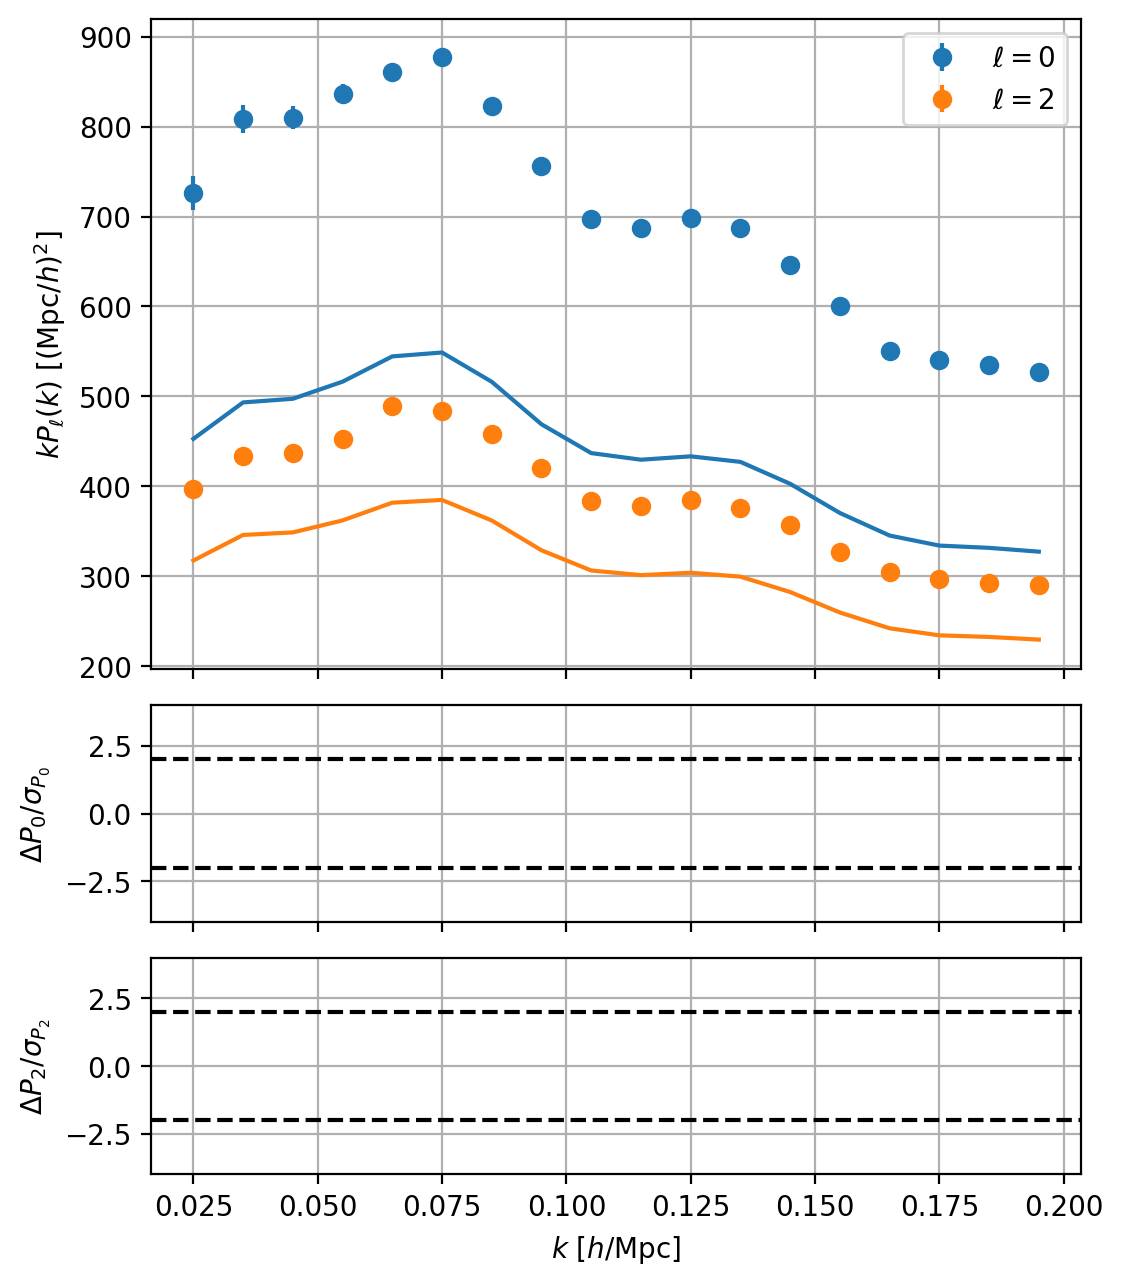

In [22]:
observable1()
observable1.plot()
plt.show()

In [4]:
theory1()

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/cosmoprimo/main/lib/python3.10/site-packages/cosmoprimo/eisenstein_hu.py:25: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


KeyError: 'f0'

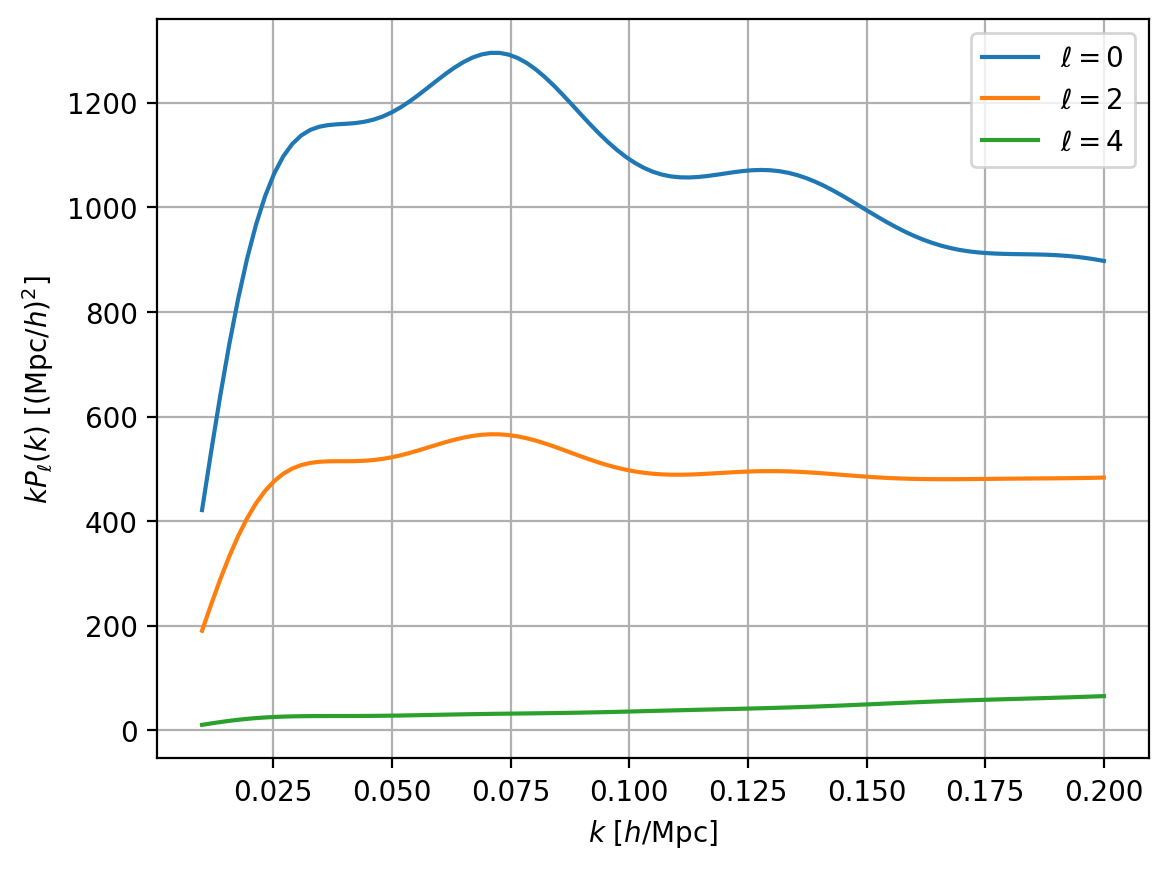

In [25]:
theory1.plot()
plt.show()

In [37]:
a,b,c=theory1()
d,e,f = theory2()
g,h,i = theory3()

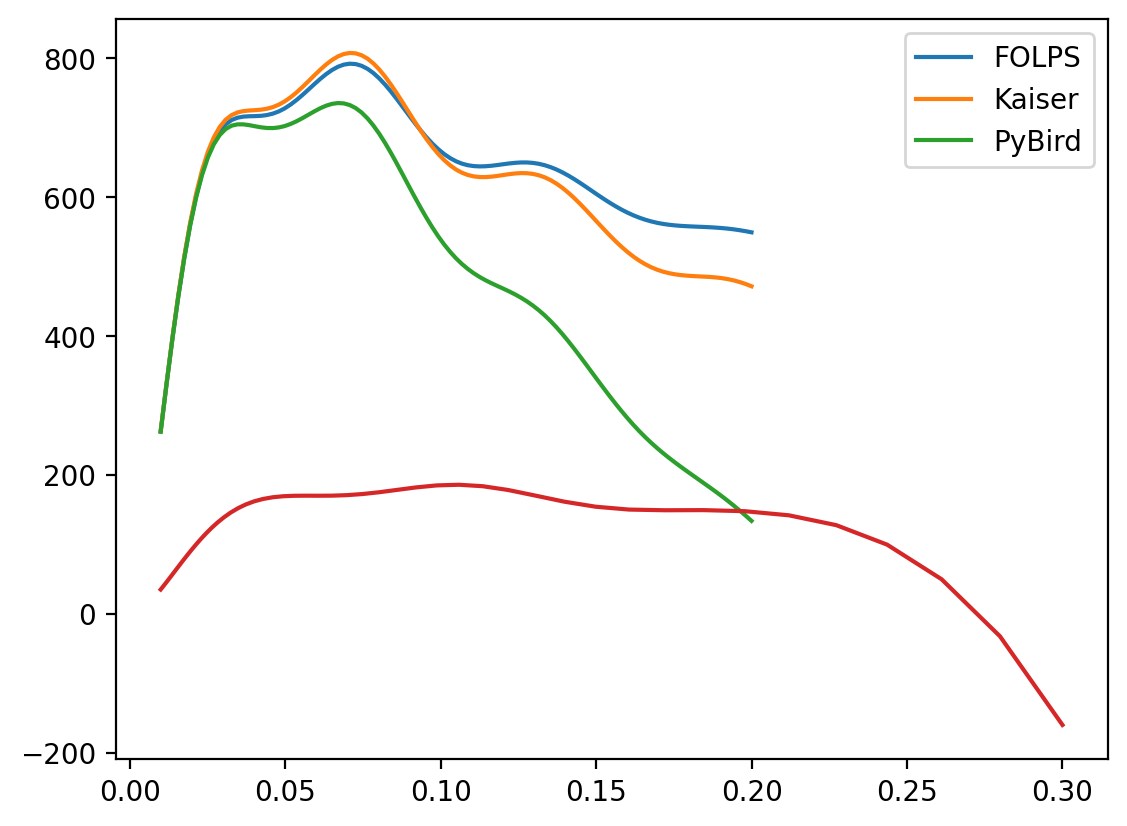

In [117]:
k =theory1.k
plt.plot(k,a*k,label='FOLPS')
plt.plot(k,d*k,label='Kaiser')
plt.plot(k,g*k,label='PyBird')
plt.plot(kh,Pkl0*kh)
plt.legend()


In [34]:
print(theory2.params['sn0'].value)

0.0


In [31]:
print(theory1.params)

ParameterCollection(['b1p', 'b2p', 'bsp', 'b3p', 'alpha0p', 'alpha2p', 'alpha4p', 'ctp', 'sn0p', 'sn2p', 'sn4p'])


In [107]:
import FOLPSnu as FOLPS
cosmo=DESI()


In [113]:
k = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = cosmo.h # get reduced Hubble for conversions to 1/Mpc
z_pk = 1.
for k_v in k:
    Pk.append(cosmo.pk_kz(k_v*h,z_pk )*h**3) # pk(k,z) in h/Mpc

In [114]:
#bias parameters
b1 = 1.;                 
b2 = 0;                 
bs2 = 0;        
b3nl = 0;  

#EFT parameters
alpha0 = 0;                 #units: [Mpc/h]^2
alpha2 = 0;             #units: [Mpc/h]^2
alpha4 = 0.0;               #units: [Mpc/h]^2
ctilde = 0.0;               #units: [Mpc/h]^4

#Stochatics parameters
alphashot0 = 0.0;          
alphashot2 = 0;          #units: [Mpc/h]^2      
PshotP = 1/1e-4;    #units: [Mpc/h]^3
NuisanParams = [b1, b2, bs2, b3nl, alpha0, alpha2, alpha4, ctilde, alphashot0, alphashot2, PshotP]

In [102]:
matrices = FOLPS.Matrices()

N = 128 sampling points
M matrices have been computed


In [115]:
pk_linearT = np.array([k, Pk])
CosmoParams = [1, omega_b, omega_cdm, omega_ncdm[0], cosmo.h]
nonlinear=FOLPS.NonLinear(pk_linearT, CosmoParams, kminout=0.001, kmaxout=0.2, nk=120)

In [116]:
k_ev = np.logspace(np.log10(0.01), np.log10(0.3), num = 50) # array of k_ev in [h/Mpc]
kh, Pkl0, Pkl2, Pkl4 = FOLPS.RSDmultipoles(k_ev, NuisanParams, AP = False)

In [104]:
omega_b = cosmo.Omega0_b*cosmo.h**2
omega_cdm = cosmo.Omega0_cdm*cosmo.h**2
omega_ncdm = cosmo.Omega0_ncdm*cosmo.h**2


In [105]:
CosmoParams

[1, 0.02237, 0.12, 0.0006442005240774267, 0.6736]

In [3]:
%%time
#linear power spectrum
classy  = run_class(h = 0.6711, ombh2 = 0.022, omch2 = 0.122, omnuh2 = 0.0006442, 
                    As = 2e-9, ns = 0.965, z = 0.3, z_scale=[0.97],
                    N_ur = 2.0328,
                    khmin = 0.0001, khmax = 2.0, nbk = 1000, spectra = 'matter')
kwargs = {'z': 0.3, 'h': 0.6711, 'Omega_m': classy['cosmo'].Omega0_m(), 'f0':0.6900011469771554,
          'fnu':classy['cosmo'].Omega_nu/classy['cosmo'].Omega0_m()}
print('kwargs = ', kwargs)

kwargs =  {'z': 0.3, 'h': 0.6711, 'Omega_m': 0.3211636237981114, 'f0': 0.6900011469771554, 'fnu': 0.004453689063655854}
CPU times: user 37.4 s, sys: 3.06 s, total: 40.4 s
Wall time: 806 ms


In [1]:
import classy
print(classy.__file__)

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/classy-3.2.1-py3.10-linux-x86_64.egg/classy.cpython-310-x86_64-linux-gnu.so


In [3]:
cosmo = Class()

In [4]:
cosmo.compute()

CosmoComputationError: 

Error in Class: thermodynamics_init(L:302) :error in thermodynamics_helium_from_bbn(ppr,pba,pth);
=>thermodynamics_helium_from_bbn(L:1143) :could not open fA with name /global/u1/p/prakharb/hi_class_public/bbn/sBBN_2017.dat and mode "r"

In [7]:
import classy